# **Introduction**

This case study is the Capstone Project of Google Advanced Data Analytics Professional Certificate.

### Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

### Title :- Salifort Motors Employee Attrition Case Study

Author : SIDHARTH M



I have followed the PACE strategy learned from this course to complete the case study.

# **PACE stages**


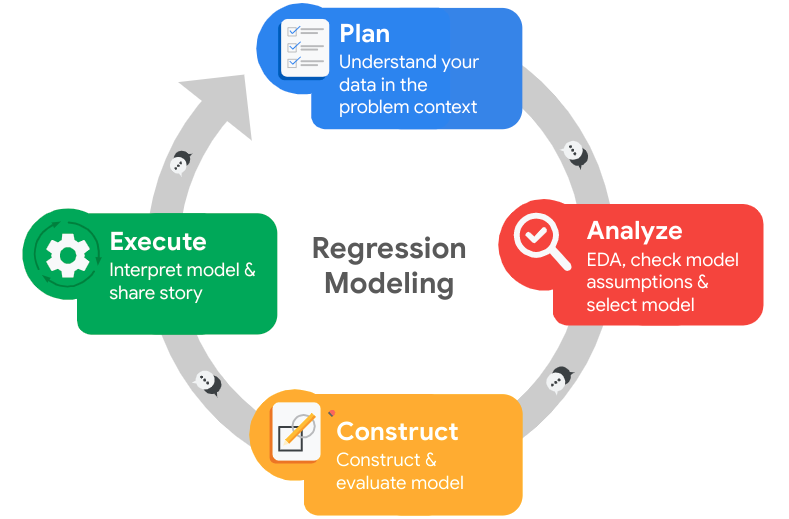

### Understanding the business scenario and problem


As part of an initiative to enhance employee satisfaction levels, the HR department at Salifort Motors sought data analytics expertise to analyze employee data. The objective was to identify potential factors that could lead to employee attrition within the company. A data analytics professional was tasked with conducting the analysis and providing data-driven recommendations based on the insights gained from the employee data.

Goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

Predicting employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### A glimpse at the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [84]:
# Importing packages

# Data Manipulation packages
import pandas as pd
import numpy as np

# Data Visulaisation Packages
import matplotlib.pyplot as plt
import seaborn as sns

#Importing packages for model construction

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [83]:

# Loading dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")

# Displaying first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gathering basic information about the data

#Checking each measures detailed
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [82]:
# Gathering descriptive statistics about the data

df0.describe()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Displaying all column names

df0.keys()


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Renaming columns as needed
df0 = df0.rename(columns = {'Work_accident':'work_accident',
                            'time_spend_company' : 'tenure',
                            'average_montly_hours' : 'average_monthly_hours',
                            'Department' : 'department'
})


# Displaying all column names after the update

df0.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [81]:
# Checking for missing values

df0.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [78]:
# Checking for duplicates

df0.duplicated().sum()


3008

In [79]:
# Inspecting some rows containing duplicates as needed

df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Droping duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep = 'first')


# Displaying first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

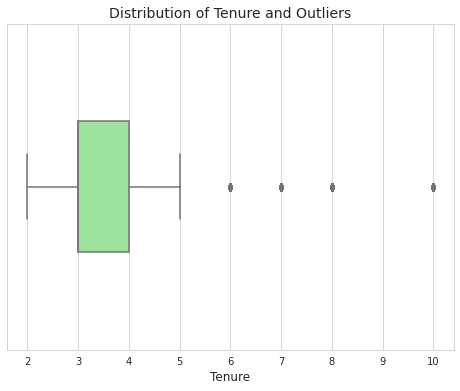

In [80]:

# Creating the box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df1['tenure'], color='lightgreen', width=0.4)

# Setting title and label fonts
plt.title('Distribution of Tenure and Outliers', fontsize=14)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('')

# Showing the plot
plt.show()


There are outliers present in the Tenure feature. Dealing with outliers is very important while analyzing the data since it can impact the model performance to an extent.

In [85]:
# Determining the number of rows containing outliers
# Computing the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Computing the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Computing the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Defining the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identifying subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Counting how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))



Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [86]:
# Getting numbers of people who left vs. stayed

print(df1['left'].value_counts())


# Getting percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

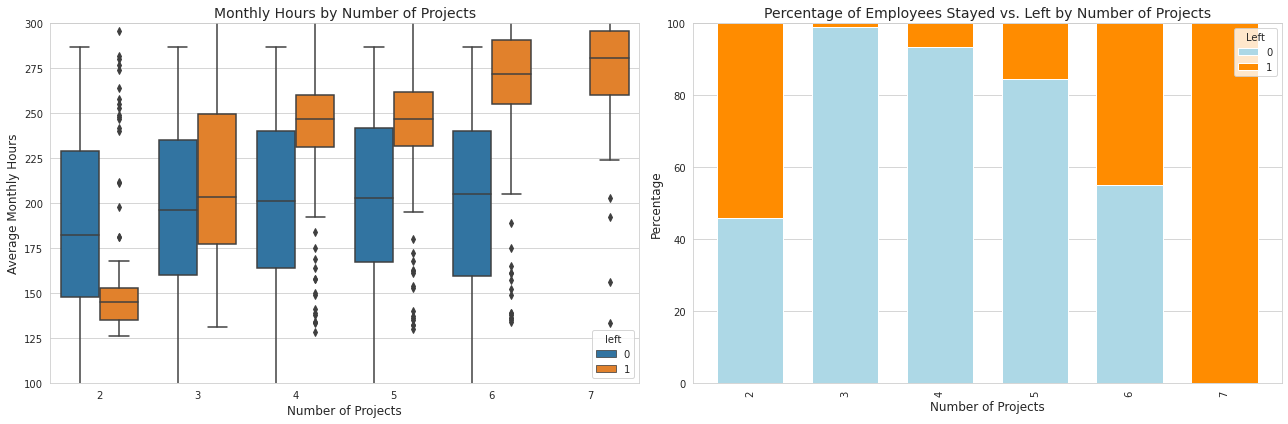

In [87]:

fig, ax = plt.subplots(1, 2, figsize=(18,6))

# Creating box plots showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='number_project', y='average_monthly_hours', hue='left', ax=ax[0])
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)
ax[0].set_xlabel('Number of Projects', fontsize=12)
ax[0].set_ylabel('Average Monthly Hours', fontsize=12)

# Bar plot showing the percentage of employees who stayed and left for each `number_project` group
grouped_df = df1.groupby(['number_project', 'left']).size().unstack()
grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100
colours = ['lightblue', 'darkorange']
grouped_df.plot(kind='bar', stacked=True, ax=ax[1], width=0.7, color = colours)
ax[1].set_title('Percentage of Employees Stayed vs. Left by Number of Projects', fontsize=14)
ax[1].set_xlabel('Number of Projects', fontsize=12)
ax[1].set_ylabel('Percentage', fontsize=12)
ax[1].legend(title='Left', title_fontsize=10, loc='upper right', fontsize=10)

# Setting common y-axis limits for both plots
ax[0].set_ylim(bottom=100, top=300)
ax[1].set_ylim(top=100)

# Showing the plots
plt.tight_layout()
plt.show()


* The observed plots indicate that employees working on more projects tend to work longer hours. Notably, two distinct groups of employees who left the company can be identified: one group with considerably fewer working hours compared to their peers with the same number of projects, and another group with significantly more working hours. The former group may include individuals who were fired or had already given their notice, while the latter likely consists of employees who quit voluntarily, potentially being key contributors to their projects.

* Remarkably, all employees with seven projects left the company, and those with six projects showed a high interquartile range of approximately 255-295 hours per week, exceeding other groups significantly.

* The data suggests that the optimal number of projects for employee retention lies between three and four, as these cohorts have a notably lower left-to-stayed ratio.

* It is essential to note that most employees, even those who remained with the company, worked more than the standard working hours per month, potentially indicating an overworked environment.

* The average monthly hours work considering an entire year should be 166.67 hrs considering working 40hrs a week

In conclusion, the insights derived from the data analysis suggest a potential relationship between project workload, working hours, and employee attrition. Addressing workload distribution and promoting a balanced project assignment could contribute to improved employee satisfaction and retention.

In [15]:
df1[df1['number_project']==7]['left'].value_counts()


1    145
Name: left, dtype: int64

So, all the 145 employees who worked in 7 projects left the company.

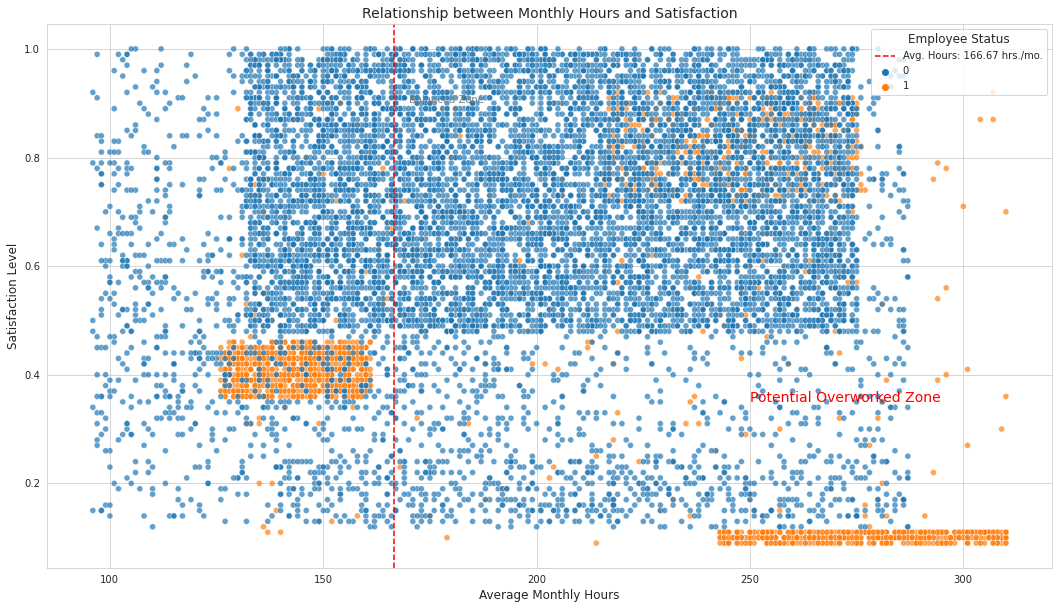

In [88]:
# Creating a plot as needed

plt.figure(figsize=(18, 10))
sns.set_style('whitegrid')

# Creating scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
scatter = sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.7)

# Adding vertical line at the average working hours per month
plt.axvline(x=166.67, color='red', label='Avg. Hours: 166.67 hrs./mo.', linestyle='--')

# Customizing legend
plt.legend(title='Employee Status', fontsize=10, title_fontsize=12)

# Setting axis labels and title
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Satisfaction Level', fontsize=12)
plt.title('Relationship between Monthly Hours and Satisfaction', fontsize=14)

# Adding context to the plot
plt.text(250, 0.35, 'Potential Overworked Zone', fontsize=14, color='red', ha='left')
plt.text(170, 0.9, 'Balanced Zone', fontsize=10, color='gray', ha='left')

# Showing the plot
plt.show()


The scatterplot above reveals distinct clusters of employees based on their `average_monthly_hours` and `satisfaction_level`. Here are the key insights:

1. Cluster 1: Overworked and Dissatisfied
   - This sizable group worked approximately 240–315 hours per month (equivalent to over 75 hours per week for a whole year).
   - Their satisfaction levels were close to zero, indicating a potential negative impact on job satisfaction due to excessive workload.

2. Cluster 2: Moderate Hours, Low Satisfaction
   - Another group of employees who left had more normal working hours.
   - However, their satisfaction levels were only around 0.4, suggesting factors other than working hours might have influenced their decision to leave.
   - Possible reasons could include feeling pressured to work more compared to their peers or facing job-related challenges that affected their satisfaction.

3. Cluster 3: Balanced Workload and Higher Satisfaction
   - A third group worked approximately 210–280 hours per month.
   - They had satisfaction levels ranging from 0.7 to 0.9, indicating a more content work experience.
   - These employees seemed to strike a better balance between workload and job satisfaction.

Notably, the plot's peculiar distribution shape suggests potential data manipulation or the presence of synthetic data, which may need further investigation.

In summary, the scatterplot offers valuable insights into the relationship between working hours and employee satisfaction, identifying distinct employee clusters with varied levels of job satisfaction and workload, shedding light on potential reasons for employee attrition, and prompting the need for further data scrutiny and analysis.

No handles with labels found to put in legend.


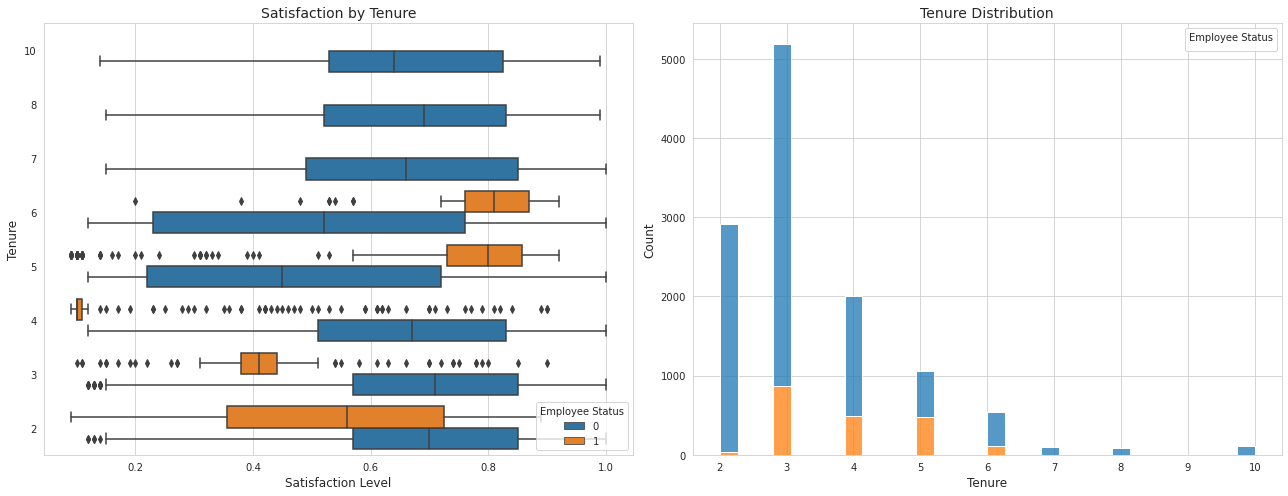

In [17]:
# Analyzing relationship between tenure and satisfaction level.

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Create box plot to show the distribution of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize=14)
ax[0].set_xlabel('Satisfaction Level', fontsize=12)
ax[0].set_ylabel('Tenure', fontsize=12)
ax[0].legend(title='Employee Status', title_fontsize=10, loc='lower right', fontsize=10)

# Create histogram to show the distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='tenure', hue='left', multiple='stack', bins=30, edgecolor='white', ax=ax[1])
ax[1].set_title('Tenure Distribution', fontsize=14)
ax[1].set_xlabel('Tenure', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].legend(title='Employee Status', title_fontsize=10, loc='upper right', fontsize=10)

# Show the plots
plt.tight_layout()
plt.show()



The box plot visualization offers valuable insights into employee tenure and satisfaction levels, providing a comprehensive understanding of the data:

1. **Distinct Employee Categories**: Employees who left the company can be categorized into two main groups. The first group consists of dissatisfied employees with relatively shorter tenures. The second group comprises highly satisfied employees who had medium-length tenures. The distinct separation between these categories suggests varying reasons for employee attrition.

2. **Four-Year Employee Anomaly**: Notably, employees with four years of tenure who left the company appear to have unusually low satisfaction levels. Further investigation into changes in company policies or other factors affecting employees at the four-year mark could reveal critical insights to address retention challenges.

3. **Longest-Tenured Employees**: The box plot indicates that the longest-tenured employees did not leave the company. Their satisfaction levels align with those of newer employees who decided to stay. This observation highlights the importance of employee satisfaction in fostering long-term commitment and loyalty.

4. **Distribution of Tenure**: The histogram shows that there are relatively few longer-tenured employees, which could potentially represent higher-ranking and higher-paid individuals. Understanding the composition of this group can provide valuable insights into the retention of key talent within the organization.

To proceed with the data analysis, calculating the mean and median satisfaction scores of employees who left and those who stayed would provide further quantitative measures to compare satisfaction levels between the two groups. This additional analysis will help gain a more comprehensive understanding of the factors influencing employee retention and satisfaction within the company.

In [18]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Since median is higher than the mean in case of people who have stayed the distribution msut be left skewed and as expected the values of mean and median of satisfaction level is higher for employees who stayed the employees who left.

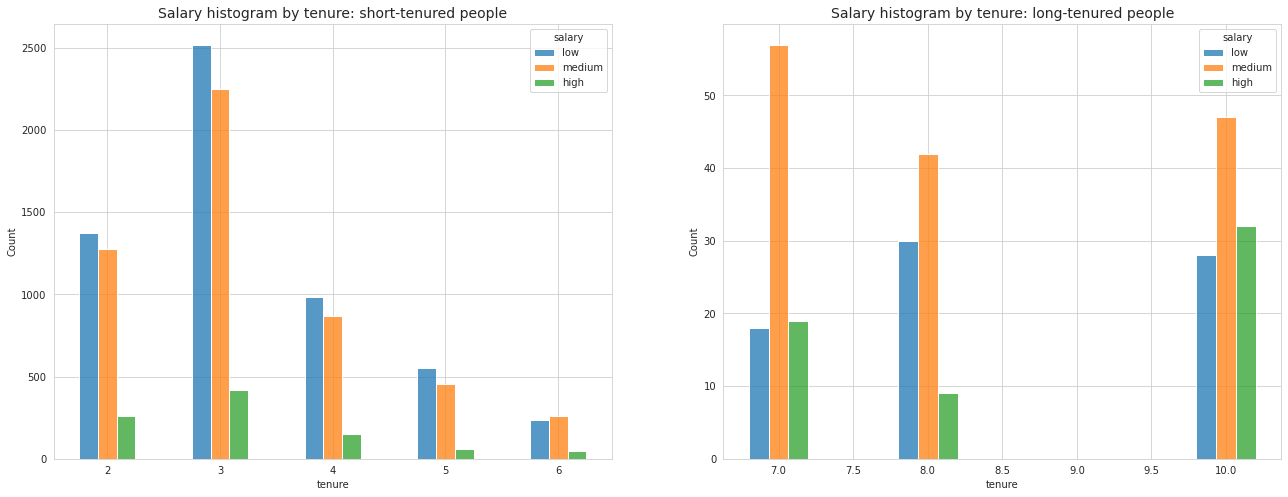

In [19]:
# Analysing the salary level of employes vs Tenure since we have observed that people who had more tenure and 
# high satisfaction level still left the company.

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The employees with high tenure are paid high compared to whom had less tenures. The majority of employees who even had 5 years of tenure is paid at low level, which can be one of the reason why a portion of those employees left the company.

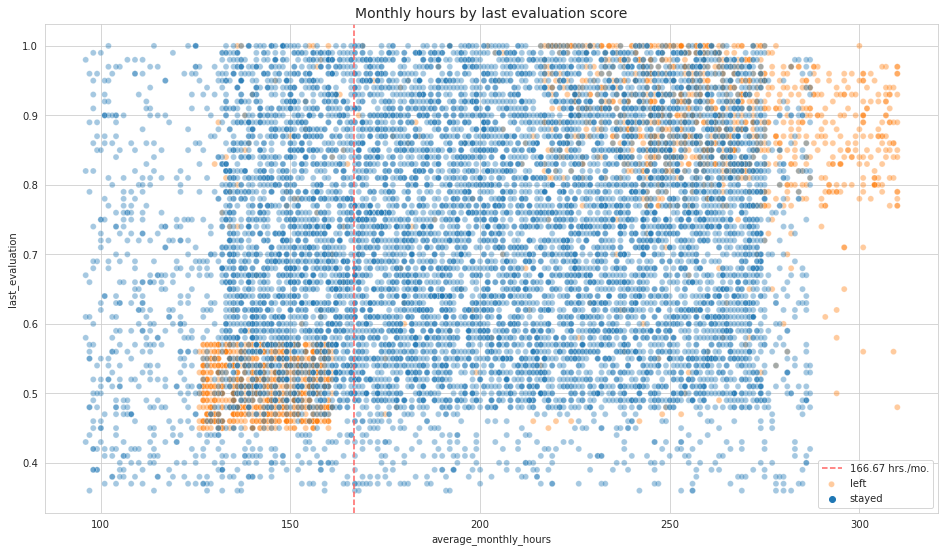

In [20]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


Observations from the scatterplot:

1. Two groups of employees who left:
   - Overworked employees with high evaluation scores.
   - Employees working slightly below the nominal average with lower evaluation scores.

2. Correlation between hours worked and evaluation score.

3. Working long hours doesn't guarantee a good evaluation score.

4. Most employees work well over 167 hours per month.

In summary, the scatterplot reveals distinct patterns related to working hours, evaluation scores, and employee attrition. The data highlights the impact of workload on employee performance and offers insights into the distribution of working hours within the company.

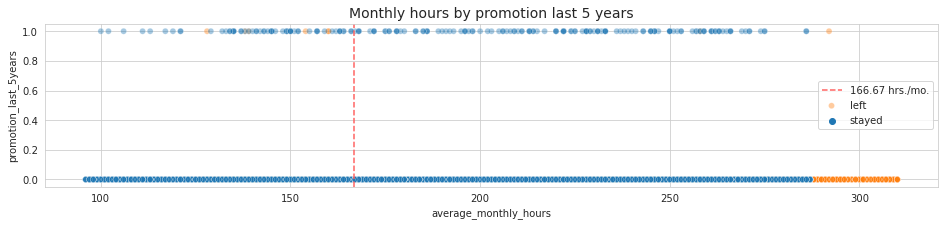

In [21]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:

* Very few employees who were promoted in the last five years left
* Very few employees who worked the most hours were promoted
* All of the employees who left were working the longest hours

In [22]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

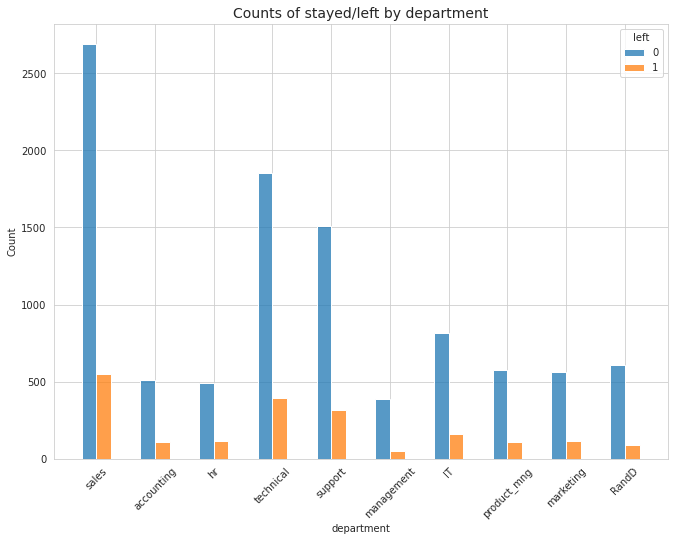

In [23]:

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

Analyzing the left status by department shows that, comparitively employees from sales,technical and support majorly left the comapny but consudering the proportions it appears to be an equal proprotion from each of the departments.

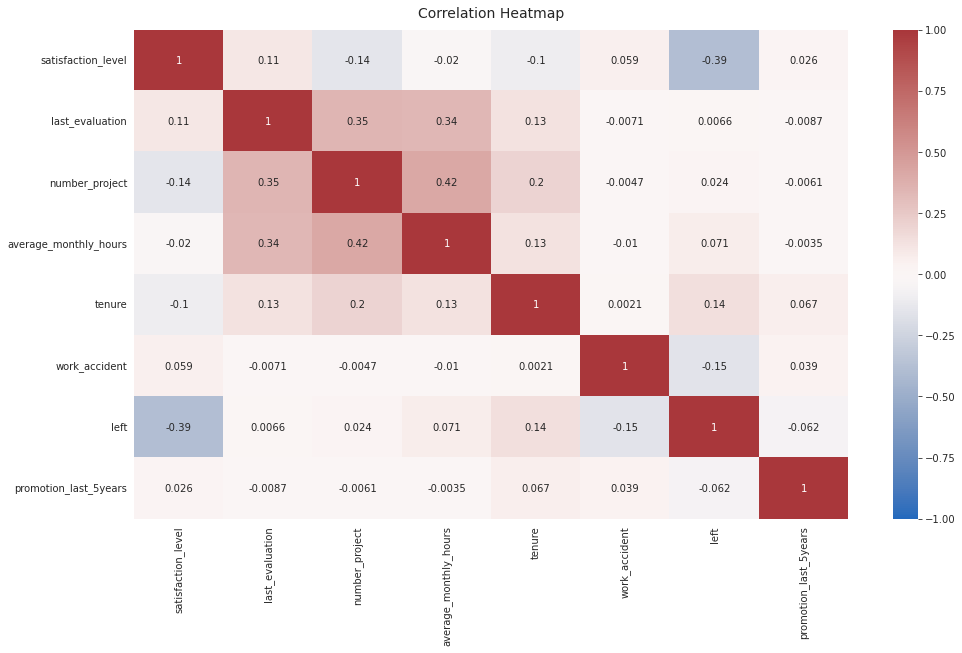

In [24]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

The comprehensive analysis of the data indicates that employee attrition at the company is potentially influenced by management practices and work-related factors. Several key insights emerge from the data:

1. **Work-Life Imbalance**: The data reveals a concerning pattern where employees who left the company tend to work longer hours and handle multiple projects. This could imply a potential work-life imbalance and heightened stress levels, contributing to dissatisfaction and eventual attrition.

2. **Impact on Job Satisfaction**: The correlation between longer working hours and lower satisfaction levels highlights the crucial link between employee well-being and job satisfaction. Employees who are overworked without adequate recognition or promotion might become disheartened, leading to their decision to leave.

3. **Burnout and Job Dissatisfaction**: The presence of a significant group of employees possibly experiencing burnout is a red flag for the organization. Prolonged periods of excessive workload and limited rewards could lead to a decrease in productivity, engagement, and overall job satisfaction.

4. **Experience and Retention**: Notably, employees who have spent more than six years at the company exhibit higher retention rates. This suggests that seasoned employees might have a better sense of stability, recognition, and opportunities for growth, contributing to their decision to stay with the company.

In summary, the data strongly points towards poor management practices and work-related factors as drivers of employee attrition. To address this critical issue, the company should focus on improving work-life balance, recognizing and rewarding employee efforts, and providing opportunities for growth and development. By addressing these areas, the company can foster a healthier and more fulfilling work environment, reducing burnout and enhancing employee satisfaction, thus improving overall retention and organizational success.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Its a simple binary classification prediction task where we have to predict whether the employee left or the employee stayed.

### Identify the types of models most appropriate for this task.

Since there is not much complexity in the problem and almost their are existing linear relationships, we can go with Logistic Regression or a Tree based Approach would also do fine.

## Approach 1: Model - Logistic Regression##

We can see, we got two categorical features, so before goinng into constrcuting the model, we have change this categorical variables to numeric values. Here department can be done by the method of dummies but the salary feature is ordinal which means they are in a order , so we can assign them with values according to an order, so no need of using dummy method.

In [25]:
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

#Here all the operations are done in the copy of the dataframe so that we dont lose the actual original dataset.

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


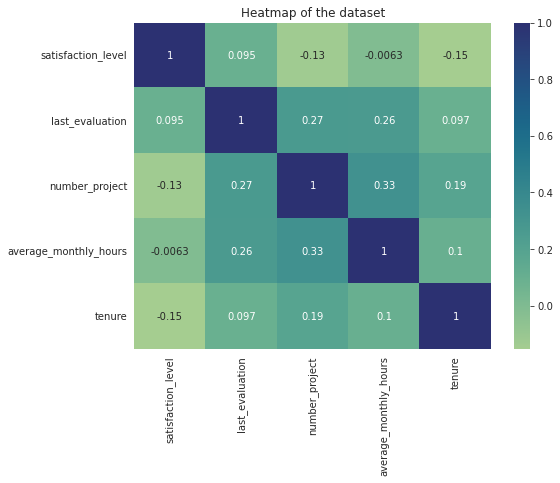

In [26]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

As we know Logistic Regression is quite sensitive to the outliers, I think its best to avoid the outliers from the tenure feature so that our model become more effficient.

In [27]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


So, this is our final dataframe or dataset for constructing the model.

In [28]:
y = df_logreg['left']
X = df_logreg.drop(['left'], axis = 1)

In [29]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=13)

In [30]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=13, max_iter=500).fit(X_train, y_train)

In [31]:
y_pred = log_clf.predict(X_test)

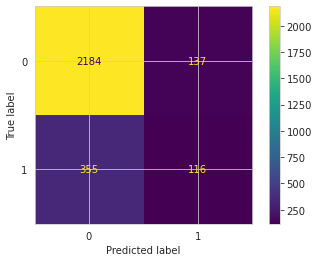

In [32]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The confusion matrix analysis provides valuable insights into the model's predictive performance. Let's break down the key metrics:

* True Negatives (TN): These are instances where the model accurately predicted that individuals did not leave, and indeed, they did not leave.

* False Positives (FP): These are cases where the model incorrectly predicted that individuals left, but they did not leave in reality.

* False Negatives (FN): These are instances where the model inaccurately predicted that individuals did not leave, but they actually left.

* True Positives (TP): These are cases where the model accurately predicted that individuals left, and indeed, they left.

In [33]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

Upon examining the dataset, we find an approximate 83%-17% split between non-leaving and leaving employees, respectively. Although the data is not perfectly balanced, it does not exhibit severe imbalance. In scenarios with more pronounced imbalances, resampling techniques might be necessary to address the issue.

Given the relatively moderate imbalance in this dataset, we can proceed with the evaluation of the model without modifying the class balance. This approach allows us to obtain meaningful insights and assess the model's performance effectively.

#### Classification Report

In [34]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.46      0.25      0.32       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.82      0.80      2792





1. Precision (Weighted Average): The model achieved an overall precision of 79%, reflecting the ability to accurately identify both leaving and non-leaving employees. However, it's crucial to note that precision alone may not fully address the priority of predicting employees who leave.

2. Recall (Weighted Average): The recall score, also known as sensitivity or true positive rate, stands at 82%. This metric indicates the model's proficiency in capturing the majority of actual leaving employees. An 82% recall signifies that the model correctly identified 82% of employees who actually left the company.

3. F1-Score (Weighted Average): The f1-score, a harmonic mean of precision and recall, is at 80%. This balanced measure assesses the trade-off between precision and recall. An f1-score of 80% demonstrates the model's ability to strike a harmonious balance between accurate predictions and capturing actual leaving employees.

4. Accuracy: The overall accuracy of the model is 82%, indicating its success in classifying both leaving and non-leaving employees correctly. Nonetheless, the accuracy metric may not fully capture the model's effectiveness in identifying employees who leave, as it weighs both classes equally.

5. Focus on Predicting Employees Who Leave: For organizations where identifying leaving employees is of utmost importance, the lower scores for precision, recall, and f1-score specific to the leaving class should be considered. The model's performance in correctly predicting employees who leave may require further optimization.


## Approach 2 : Model -  Tree Based Model## 

#### DecisionTreeClassifier - Approach Number 1 

In [35]:
# Isolate the outcome variable
y = df_enc['left']
# Select the features
X = df_enc.drop('left', axis=1)

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [37]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [38]:
tree1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [39]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [40]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

It can observed that the AUC score is very good indicating it can predict the employees who is gonna leave the company.

##### Function Definiton for Getting all the scores

In [41]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [42]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


The performance scores achieved by the decision tree model are promising indicators of its effectiveness. However, it's important to be aware of the risk of overfitting when using decision trees. Overfitting occurs when the model captures noise and specific patterns in the training data too well, making it less generalizable to new, unseen data.

To address the overfitting issue, you can consider constructing a random forest model as the next step. Random forests are an ensemble learning technique that utilizes multiple decision trees to make predictions. By combining the predictions from multiple trees and using techniques such as bagging and feature randomness, random forests tend to be more robust and less prone to overfitting compared to individual decision trees. This allows the model to maintain a good level of performance on both the training data and unseen data, providing more reliable and generalizable predictions.

##### RandomForest - Approach 1

In [43]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [44]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 11min 3s, sys: 1.54 s, total: 11min 5s
Wall time: 11min 6s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [45]:
# Define a path to the folder where you want to save the model
path = 'D:\Data Analytics Projects\Google Advanced Data Analytics Capstone'

In [46]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [47]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [48]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [49]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [50]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [51]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [52]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Next, you can evaluate the final model on the test set.

Define a function that gets all the scores from a model's predictions.

In [53]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [54]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The observed test scores demonstrate a remarkable similarity to the validation scores, indicating the robustness of the model. This alignment between test and validation performance is highly promising and suggests that the model is well-generalized. It is important to note that the test set was exclusively reserved for evaluating this specific model, which enhances the confidence in its ability to generalize effectively to unseen data.

This favorable outcome strengthens the belief in the model's potential to perform consistently and reliably when faced with new, previously unseen data. This analysis serves as a solid foundation for making data-driven decisions, and the model's performance on the test set showcases its capacity to address the underlying business problem or inquiry with a high degree of accuracy and reliability.

#### Feature Engineering

Data leakage can lead to overly optimistic evaluation scores in a model. In this scenario, it is possible that satisfaction levels may not be reported for all employees, and the average_monthly_hours feature might contribute to data leakage. Employees who are already planning to quit or have been identified for termination could be working fewer hours.

To address this, we will perform feature engineering by dropping satisfaction_level and creating a new binary feature called "overworked" to capture whether an employee is potentially overworked. This approach aims to build improved decision tree and random forest models by avoiding data leakage and providing more reliable insights.

In [55]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [57]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [58]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [60]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2    
After feature engineering

In [61]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [62]:
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [63]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [64]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data. 


In [65]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


As anticipated, certain evaluation scores experienced a decline in this round of the model due to the reduced number of features considered. However, despite the feature reduction, the model's performance remains notably high. This outcome suggests that the selected features, including the newly engineered "overworked" variable, are still highly informative and contribute significantly to the model's predictive capabilities.

The overall robustness of the model is evidenced by its ability to maintain commendable evaluation scores even with a more constrained feature set. This implies that the "overworked" feature plays a crucial role in capturing relevant patterns and relationships in the data.

While some scores may have slightly decreased, the strong performance of the model underscores its reliability and potential effectiveness in addressing the business problem at hand. These insights affirm the value of feature engineering and reinforce confidence in the model's generalization to new, unseen data.

#### RandomForest - Approach 2

After Feature Engineering

In [66]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [67]:
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [68]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [69]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [70]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [71]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Despite a slight decline in scores, the random forest model outperforms the decision tree when considering AUC as the primary metric. As the champion model, the random forest will now be evaluated on the test set to assess its performance in a real-world scenario.

In [72]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


This seems to be a stable, well-performing final model. 

Plot a confusion matrix to visualize how well it predicts on the test set.

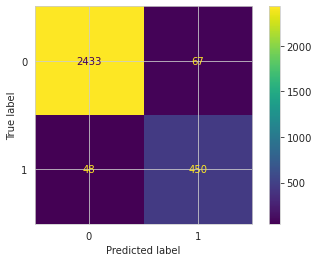

In [73]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model exhibits a higher number of false positives compared to false negatives, indicating that there is a possibility of misidentifying some employees as at risk of quitting or being terminated, when, in reality, they are not. Nevertheless, the model remains robust and displays promising performance.

For further exploration, it would be beneficial to investigate the splits within the decision tree model and examine the most influential features in the random forest model. Understanding the splits can provide valuable insights into the decision-making process of the model, while identifying the most important features can offer essential information about the factors driving employee attrition or dissatisfaction. This additional analysis would enhance our comprehension of the model's behavior and contribute to better-informed decision-making for addressing employee satisfaction levels effectively.

#### Checking Decision tree splits

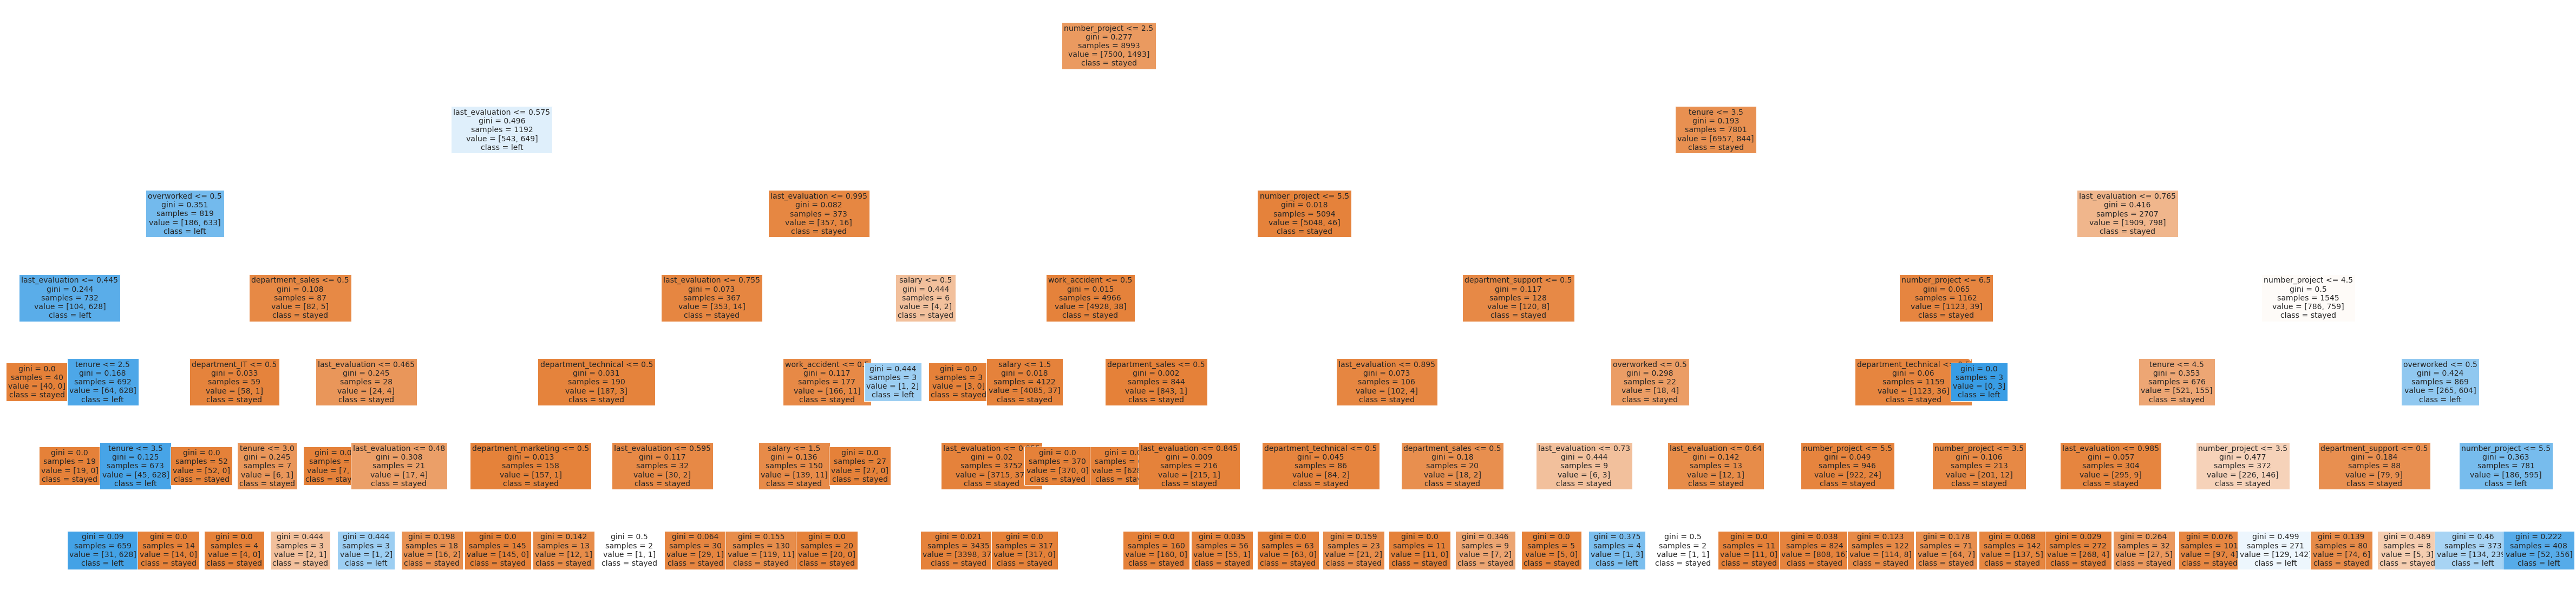

In [74]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

Note that you can double-click on the tree image to zoom in on it and inspect the splits.

#### Decision tree feature importance

In [75]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


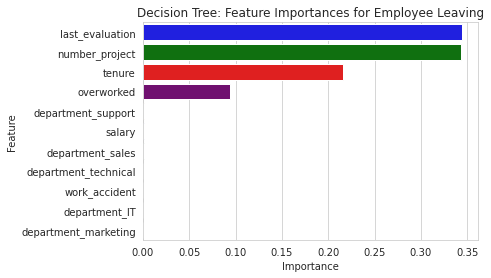

In [93]:
colors = ['blue', 'green', 'red', 'purple', 'orange']
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h',palette = colors)
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The bar plot illustrates the feature importances in the decision tree model. The variables last_evaluation, number_project, tenure, and overworked are identified as the most influential factors in predicting the outcome variable left, in descending order of importance.

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

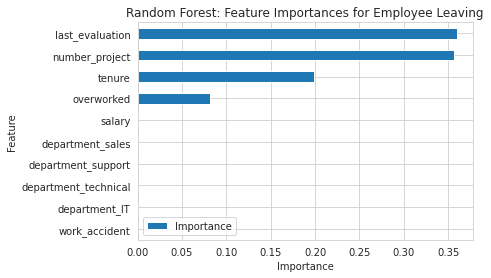

In [77]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()


The provided plot highlights the feature importances in the random forest model. last_evaluation, number_project, tenure, and overworked are identified as the most influential variables in predicting the outcome left, in descending order of importance. Interestingly, these variables align with the ones utilized in the decision tree model, emphasizing their significance in both models for predicting employee attrition.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



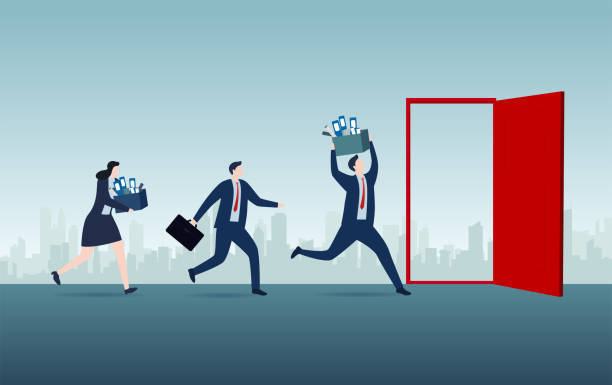

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps


Employee Retention Strategies: Addressing Overwork and Enhancing Job Satisfaction


In our data-driven analysis, we have successfully identified critical insights from our models and feature importances, shedding light on a significant concern - employee overwork. These findings serve as a crucial basis for developing strategic initiatives aimed at retaining valuable talent and fostering a positive work environment at Salifort Motors. Below are key recommendations to address overwork and boost employee satisfaction.

1. Cap Project Allocation:
Consider implementing a project cap to ensure employees are not overwhelmed with excessive workload. By striking a balance between responsibilities and available resources, employees can be empowered to achieve better work-life equilibrium, leading to improved job satisfaction and productivity.

2. Focus on Long-Tenured Employees:
Pay special attention to employees with a tenure of four years or more, as they appear to be facing heightened dissatisfaction. Conduct thorough investigations to understand the underlying reasons behind their sentiments and proactively address their concerns.

3. Recognize Efforts, Not Overtime:
Encourage a culture that rewards employees based on their contributions and efforts, rather than solely on the number of hours worked. This approach will motivate employees to be more engaged and invested in their roles, leading to enhanced job satisfaction.

4. Transparent Policies:
Ensure that employees are well-informed about the company's overtime pay policies and work expectations. Transparent communication about workload and time-off policies will foster a sense of trust and clarity among employees, reducing uncertainty and stress.

5. Foster Open Discussions:
Facilitate company-wide and team-level discussions to gain insights into the prevailing work culture and specific contexts affecting job satisfaction. Actively address concerns and provide a platform for employees to express their ideas, fostering a positive and inclusive work environment.

6. Equitable Evaluation Criteria:
Redefine the evaluation criteria to recognize and reward employees who contribute more and put in extra effort, regardless of the number of hours worked. Implementing a proportionate scale for performance evaluation will motivate employees to excel without feeling obligated to work excessive hours.

Conclusion:
By adopting these data-backed recommendations, Salifort Motors can proactively tackle employee overwork, enhance job satisfaction, and foster a supportive work environment. Prioritizing employee well-being and engagement will undoubtedly contribute to higher retention rates and a more productive, contented workforce.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 